# **02. Binary classification : Using IMDB dataset as example**

**Topic**: Classify the comments is positive or negative. IMDB is a Internet Movie Dataset.

### <font color='dark'>**Step 1: Loading data**</font>

the dataset is included in Keras

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 
# num_words=10000 代表只把字典 0 ~ 9999 所對應的單字列入考量, 可以用以下 code 確認
# print( max([max(sequence) for sequence in train_data]) )

Using TensorFlow backend.


In [2]:
print("Train data : ",train_data.shape)
print("Train labels : ",train_labels.shape)
print("Test data : ",test_data.shape)
print("Test labels : ",test_labels.shape)

Train data :  (25000,)
Train labels :  (25000,)
Test data :  (25000,)
Test labels :  (25000,)


#### **Hint**

The data is a list composed of ID number of the words, like number 1 is for 'a', number 14 is for 'apple', something like that.

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


0 is for negative; 1 is for positive.

In [4]:
print('The label for comments :',train_labels[0])

The label for comments : 1


### <font color='dark'>**Step 2: Show the word corresponded to the ID**</font>

In [5]:
# get the word index dictionat from builtin dataset
word_index = imdb.get_word_index()

# build the dictiionary reversing the ID to word
reverse_word_index = dict( [(value,key) for (key,value) in word_index.items()] )

# reverse the index list to sentences, using first comment comments as example
# Hint: dictionary.get(你的key word, 當 dictionay 查不到時要替換的值)
decoded_data = ' '.join( [reverse_word_index.get(words_index-3, '?_?') for words_index in train_data[0]] )
print(decoded_data)

?_? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ?_? is an amazing actor and now the same being director ?_? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ?_? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ?_? to the two little boy's that played the ?_? of norman and paul they were just brilliant children are often left out of the ?_? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done

### <font color='dark'>**Step 3: Perpare the data**</font>

#### **data** 

在文字的資料時，data 是一串由數字組成的 list, 且每個 comments 的 list 長度不一，這樣我們不好丟進我們的 model 來去做訓練，這邊提供兩種作法來參考

1. 填補每筆資料內容，是他們具有一樣的資料長度，然後在轉換成我們所習慣的 (樣本數, data) 的格式拿來做訓練
2. 使用 one-hot encoding 的方式來紀錄，因為我們在一開始就設定我們的 words dictionary 為 0~9999 範圍，那我們可以將每一個comments 的都拉成長度 10,000 的 list 來看，例如今天的句子為 \[1,3\]，那麼 one-hot encoding 就轉成 \[0,1,0,1,0,0,0......\] ，而轉換後的 list 長度為 10,000

這邊使用第二種方式來實現

In [6]:
import numpy as np

def one_hot_encoding_data(data, dimension=10000):
    results = np.zeros( (len(data),dimension) )
    for i,sentences in enumerate(data):
        results[i, sentences] = 1
    return results
    
x_train = one_hot_encoding_data(train_data)
x_test = one_hot_encoding_data(test_data)

In [7]:
print('train data: ', x_train[1])
print("Train data : ",x_train.shape)

train data:  [0. 1. 1. ... 0. 0. 0.]
Train data :  (25000, 10000)


#### **label**

我們同時也要把 label 向量化，這邊只有兩類，就轉成 1D array 就好了, 再來只要把它轉成 float32 就可以了

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### <font color='dark'>**Step 4: Build Network**</font>

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### <font color='dark'>**Step 5: Define the way to Compile**</font>

In [10]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [11]:
# If you want to change the parameters of optimizer or metrics, you can import it from keras
# from keras import optimizers
# from keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
#               loss='binary_crossentropy',
#               metrics=[metrics.binary_accuracy])

### <font color='dark'>**Step 6: Prepare the validation data**</font>

In [12]:
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

### <font color='dark'>**Step 7: Fit the data to model**</font>

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.5095 - acc: 0.7883 - val_loss: 0.3859 - val_acc: 0.8727
Epoch 2/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.3083 - acc: 0.9040 - val_loss: 0.3416 - val_acc: 0.8632
Epoch 3/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.2282 - acc: 0.9263 - val_loss: 0.2829 - val_acc: 0.8863
Epoch 4/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.1786 - acc: 0.9421 - val_loss: 0.3099 - val_acc: 0.8761
Epoch 5/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.1459 - acc: 0.9543 - val_loss: 0.2958 - val_acc: 0.8817
Epoch 6/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.1208 - acc: 0.9638 - val_loss: 0.3049 - val_acc: 0.8797
Epoch 7/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.1012 - acc: 0.9693 - val_loss: 0.3083 - val_ac

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### <font color='dark'>**Step 8: Draw the training history**</font>

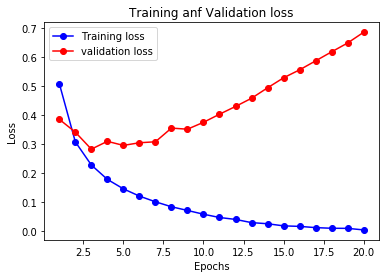

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo-', label='Training loss')
plt.plot(epochs, val_loss_values, 'ro-', label='validation loss')
plt.title('Training anf Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

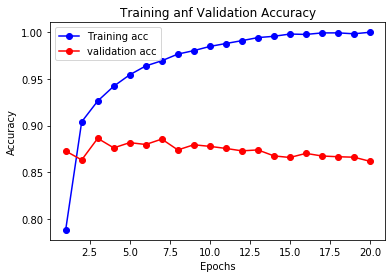

In [16]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc_values, 'bo-', label='Training acc')
plt.plot(epochs, val_acc_values, 'ro-', label='validation acc')
plt.title('Training anf Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### **Hint**

我們可以從上圖看到，最好的訓練結果是落在 第4週期 ，再接下去訓練的驗證資料所表現的 accuracy 及 loss 都不是說很好，這時我們可以用一些操作讓它取得最好的訓練結果，但這邊先跳過，我們之後再詳細說明，這邊就讓它重訓練一次只有 4 個 epoch

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))

history_dict = history.history
history_dict.keys()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 115us/step - loss: 0.5359 - acc: 0.7886 - val_loss: 0.4185 - val_acc: 0.8681
Epoch 2/4
15000/15000 [==============================] - 1s 89us/step - loss: 0.3391 - acc: 0.8983 - val_loss: 0.3264 - val_acc: 0.8829
Epoch 3/4
15000/15000 [==============================] 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

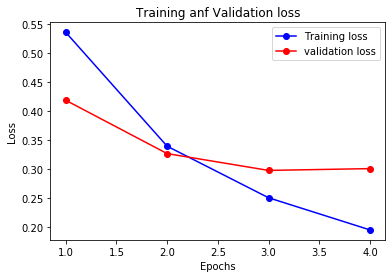

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo-', label='Training loss')
plt.plot(epochs, val_loss_values, 'ro-', label='validation loss')
plt.title('Training anf Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

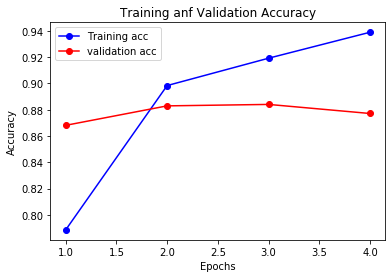

In [19]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc_values, 'bo-', label='Training acc')
plt.plot(epochs, val_acc_values, 'ro-', label='validation acc')
plt.title('Training anf Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### <font color='dark'>**Step 9: Evaluate and Predict the data**</font>

In [20]:
results = model.evaluate(x_test, y_test)
print('acc : {} % ; loss : {}'.format(results[1]*100, results[0]))

25000/25000 [==============================] - 2s 73us/step
acc : 87.208 % ; loss : 0.31304328844070434


In [21]:
predicts = model.predict(x_test)
print(predicts)

[[0.4256468 ]
 [0.9983012 ]
 [0.9721504 ]
 ...
 [0.14941113]
 [0.33379644]
 [0.6776872 ]]


因為我們是一個 sigmoid 激發函數的值，落在 0 ～ 1 之間，然後我們的 label 是 0 為 negative，1 為 positive，那麼我們可以定義成 0～0.2 為負面： 0.9 以上為正面：剩下中間是模糊地帶這樣。